### Clean and transform the temperatures and load into a dataframe

In [1]:
import pandas as pd

nyc = pd.read_csv('nyc_avg_jan_1895-2021.csv')
nyc.Date = nyc.Date.floordiv(100)
nyc.columns = ['Year', 'Temperature', 'Anomaly']

nyc.head(3)

Year  Temperature  Anomaly
0  1895         33.2     -3.8
1  1896         33.4     -3.6
2  1897         34.3     -2.7

### Split the data for training and testing

In [2]:
len(nyc.Year.values)

127

In [3]:
nyc.Year.values

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [4]:
nyc.Year.values.reshape(-1, 1)

array([[1895],
       [1896],
       [1897],
       [1898],
       [1899],
       [1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [19

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(nyc.Year.values.reshape(-1, 1), 
                     nyc.Temperature.values, 
                     random_state=11)

In [6]:
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (95, 1)
Shape of testing  set = (32, 1)


### Train the model

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'regression coefficient (slope) = {linear_regression.coef_}')
print(f'                     intercept = {linear_regression.intercept_}')

regression coefficient (slope) = [0.03061817]
                     intercept = -23.15950296932693


### Test the model

In [8]:
predicted = linear_regression.predict(X_test)
expected  = y_test

for p, e in zip(predicted, expected):
    print(f'predicted: {p:.2f}, expected: {e:.2f}, difference: {p - e:5.2f}')

predicted: 36.42, expected: 39.30, difference: -2.88
predicted: 34.92, expected: 34.30, difference:  0.62
predicted: 37.25, expected: 39.60, difference: -2.35
predicted: 35.14, expected: 28.10, difference:  7.04
predicted: 35.35, expected: 40.00, difference: -4.65
predicted: 37.22, expected: 39.50, difference: -2.28
predicted: 34.86, expected: 33.20, difference:  1.66
predicted: 38.02, expected: 45.80, difference: -7.78
predicted: 38.41, expected: 34.80, difference:  3.61
predicted: 36.64, expected: 41.20, difference: -4.56
predicted: 35.75, expected: 38.10, difference: -2.35
predicted: 37.89, expected: 31.50, difference:  6.39
predicted: 36.52, expected: 42.30, difference: -5.78
predicted: 38.11, expected: 38.80, difference: -0.69
predicted: 35.05, expected: 36.40, difference: -1.35
predicted: 36.76, expected: 33.00, difference:  3.76
predicted: 38.32, expected: 42.40, difference: -4.08
predicted: 36.70, expected: 34.90, difference:  1.80
predicted: 37.16, expected: 29.00, difference:

### Predict future temperatures and estimate past temperatures 

In [12]:
def predict_temperature(linear_regression, year):
    m = linear_regression.coef_
    b = linear_regression.intercept_
    x = year
    
    y_hat = m*x + b
    
    return y_hat[0]

In [13]:
year = 1890
temp = predict_temperature(linear_regression, year)

print(f'The estimated temperature in year {year} is {temp:.2f}')

The estimated temperature in year 1890 is 34.71


In [14]:
year = 2022
temp = predict_temperature(linear_regression, year)

print(f'The predicted temperature in year {year} is {temp:.2f}')

The predicted temperature in year 2022 is 38.75


### Scatter plot with regression line

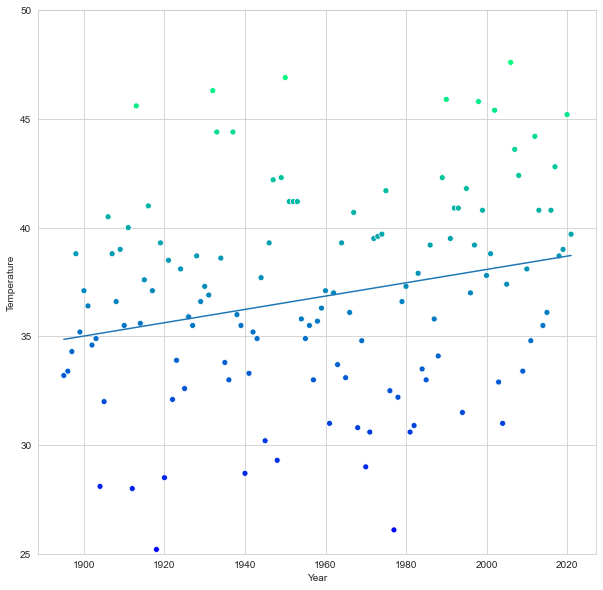

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))

axes = sns.scatterplot(data=nyc, x='Year', y='Temperature',
                       hue='Temperature', palette='winter', 
                       legend=False)
axes.set_ylim(25, 50)

x = np.array([min(nyc.Year.values), max(nyc.Year.values)])
y = x*linear_regression.coef_ + linear_regression.intercept_

line = plt.plot(x, y)

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################